In [1]:
import pandas as pd
#Read in data
myData = pd.read_csv("C:\\Users\LethalValdi\Documents\St Andrews\ID5059\Project1\Project1ID5059\pp-complete.csv",nrows = 100000, header =None)


In [2]:
#Check out the data 
myData.head()
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
0     100000 non-null object
1     100000 non-null int64
2     100000 non-null object
3     99926 non-null object
4     100000 non-null object
5     100000 non-null object
6     100000 non-null object
7     99995 non-null object
8     8277 non-null object
9     98529 non-null object
10    94935 non-null object
11    100000 non-null object
12    100000 non-null object
13    100000 non-null object
14    100000 non-null object
15    100000 non-null object
dtypes: int64(1), object(15)
memory usage: 12.2+ MB


In [3]:
#Select variables of interest
modelData = myData[[1,2,4,6,11]]
#Rename variables
modelData = modelData.rename(columns={1: "Price", 2: "Date",4: "Type", 6: "Duration", 11:"Location"})
modelData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
Price       100000 non-null int64
Date        100000 non-null object
Type        100000 non-null object
Duration    100000 non-null object
Location    100000 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
#Format date to better deal with it
modelData['Date'] = pd.to_datetime(modelData['Date'], format = '%Y-%m-%d')

#Get the months
modelData['Month'] = modelData['Date'].dt.month

#Check out data
modelData.info()
modelData.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
Price       100000 non-null int64
Date        100000 non-null datetime64[ns]
Type        100000 non-null object
Duration    100000 non-null object
Location    100000 non-null object
Month       100000 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.6+ MB


,Price,Date,Type,Duration,Location,Month
0,18500,1995-01-31,F,L,TORQUAY,1
1,73450,1995-10-09,D,F,LIVERPOOL,10
2,59000,1995-03-31,D,F,POOLE,3
3,31000,1995-12-04,D,F,WOODBRIDGE,12
4,95000,1995-09-22,D,F,LICHFIELD,9
...,...,...,...,...,...,...
195,42000,1995-12-21,S,F,NEWCASTLE UPON TYNE,12
196,95000,1995-03-03,S,F,GRAYS,3
197,74950,1995-10-03,D,F,MIDDLEWICH,10
198,43500,1995-11-14,S,F,BILLINGHAM,11


In [5]:
#add dummy variable "one-hot encode variable" if location of house is in London
from pandas import DataFrame
modelData['isLondon'] = modelData['Location'].apply(lambda x: 1 if x == 'LONDON' else 0)

print (modelData) 

        Price       Date Type Duration      Location  Month  isLondon
0       18500 1995-01-31    F        L       TORQUAY      1         0
1       73450 1995-10-09    D        F     LIVERPOOL     10         0
2       59000 1995-03-31    D        F         POOLE      3         0
3       31000 1995-12-04    D        F    WOODBRIDGE     12         0
4       95000 1995-09-22    D        F     LICHFIELD      9         0
...       ...        ...  ...      ...           ...    ...       ...
99995   36500 1995-09-29    D        F  BOGNOR REGIS      9         0
99996  310000 1995-03-15    D        F        WOKING      3         0
99997   50000 1995-10-19    T        F      BASILDON     10         0
99998   42000 1995-05-05    T        L          BURY      5         0
99999   50500 1995-09-15    S        F    PONTYPRIDD      9         0

[100000 rows x 7 columns]


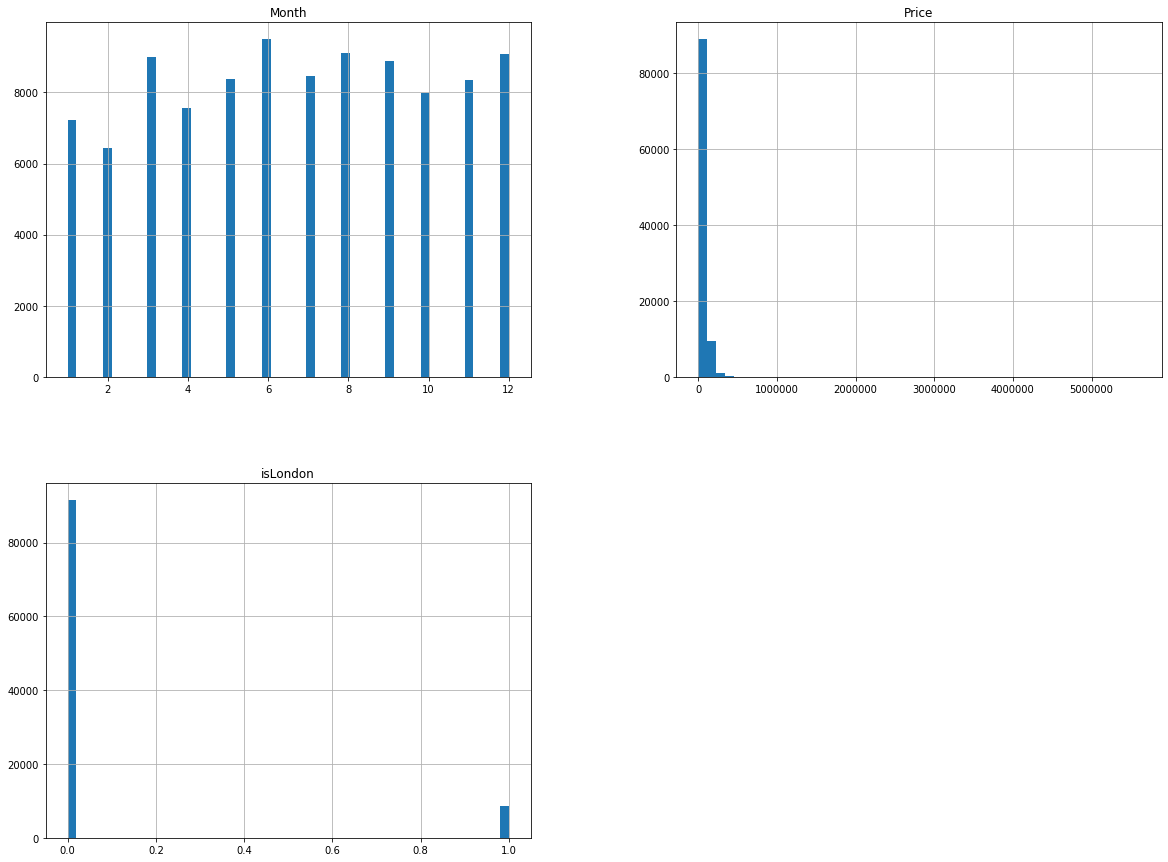

In [7]:
#Check out histograms for the continuous variables
import matplotlib.pyplot as plt
%matplotlib inline
modelData.hist(bins=50, figsize=(20,15))
plt.show()

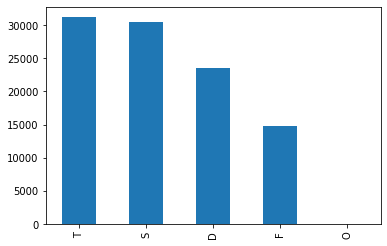

In [13]:
#Get some bar charts of the categorical variables
modelData['Type'].value_counts().plot(kind='bar')

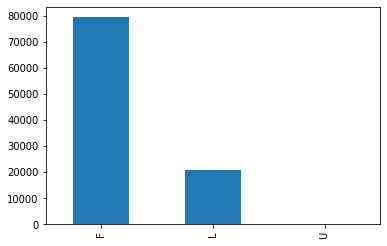

In [14]:
modelData['Duration'].value_counts().plot(kind='bar')

In [15]:
#Get dummy variables for each type of house and add to dataset
typeDummy = pd.get_dummies(modelData['Type'])
modelData = modelData.drop('Type',axis = 1)
modelData = modelData.join(typeDummy)

#Rename dummy variables for type of house because type of house and duration are both encoded with F 
modelData = modelData.rename(columns={'D': "TypeD",'F': "TypeF",'O': "TypeO", 'S': "TypeS", 'T': "TypeT"})


In [17]:
#Get dummy variables for each Duration category of the dataset
durationDummy = pd.get_dummies(modelData['Duration'])
modelData = modelData.drop('Duration',axis = 1)
modelData = modelData.join(durationDummy)

#Rename them
modelData = modelData.rename(columns = {'F': 'DurationF', 'L': 'DurationL', 'U': 'DurationU'})


In [18]:
#Make seperate dataset for further cleaning of data
cleanedData = modelData.copy()

In [20]:
#Delete unneccesary variables
del cleanedData['Date']
del cleanedData['Location']

In [21]:
#Split to test and training set, test data is data in december, rest is training data
trainData = cleanedData[cleanedData.Month != 12]
trainData.info()
testData = cleanedData[cleanedData.Month == 12]
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90923 entries, 0 to 99999
Data columns (total 11 columns):
Price        90923 non-null int64
Month        90923 non-null int64
isLondon     90923 non-null int64
TypeD        90923 non-null uint8
TypeF        90923 non-null uint8
TypeO        90923 non-null uint8
TypeS        90923 non-null uint8
TypeT        90923 non-null uint8
DurationF    90923 non-null uint8
DurationL    90923 non-null uint8
DurationU    90923 non-null uint8
dtypes: int64(3), uint8(8)
memory usage: 3.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9077 entries, 3 to 99974
Data columns (total 11 columns):
Price        9077 non-null int64
Month        9077 non-null int64
isLondon     9077 non-null int64
TypeD        9077 non-null uint8
TypeF        9077 non-null uint8
TypeO        9077 non-null uint8
TypeS        9077 non-null uint8
TypeT        9077 non-null uint8
DurationF    9077 non-null uint8
DurationL    9077 non-null uint8
DurationU    9077 non-null uint

In [22]:
#Remove months from the training and test data since that was used to split the data
del trainData['Month']
del testData['Month']

In [23]:
#Make a variable which only includes the variable we want to predict which is the price of the property
trainPrice = trainData['Price']

In [28]:
#Fit random forest model
from sklearn.ensemble import RandomForestRegressor
ranForReg = RandomForestRegressor()
ranForReg.fit(trainData, trainData['Price'])

C:\Users\LethalValdi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [30]:
#Notice we get 10 as number of estimators lets see how well the algorithm predicts by using 10-fold cross-validation
import numpy as np
from sklearn.model_selection import cross_val_score
myScores = cross_val_score(ranForReg, trainData, trainPrice,  scoring="neg_mean_squared_error", cv=10)
ranForRmse = np.sqrt(-myScores)

In [32]:
#Display the errors of the model that is the mean of the root squared mean errors and the standard deviation
def displayScores(myScores):
   print("Scores:", myScores)
   print("Mean:", myScores.mean())
   print("Standard deviation:", myScores.std())
displayScores(ranForRmse)

Scores: [  520.81976329   250.86958518   117.04140826  1090.49780915
   857.25547912   224.44401556   373.59142069   732.42176982
 40136.18425519   772.84192396]
Mean: 4507.596743021031
Standard deviation: 11879.918494828398


In [33]:
#Check how well it does compared to the mean of the price
ranForRmse.mean() / trainPrice.mean()


0.06736980695642733

In [34]:
#Finetune the model, use cross validation to check which values for the hyperparamters give the lowest errors
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [5,10,15,20,25,30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [5, 15,30], 'max_features': [2, 3,4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(trainData, trainPrice)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [47]:
#Check out results
grid_search.best_params_

{'max_features': 8, 'n_estimators': 15}

In [37]:
#Get our final model with the finetuned hyperparameteres
finalModel = grid_search.best_estimator_

In [41]:
#Check how well our final model predicts tor the test set
testPrice = testData['Price']

In [43]:

from sklearn.metrics import mean_squared_error
#Get root squared mean errors for the test set, that is see how well the model predicts on the testing set and compare to the mean of the price
finalPreds = finalModel.predict(testData)
final_mse = mean_squared_error(testPrice, finalPreds)
final_rmse = np.sqrt(final_mse) 
final_rmse
#

9184.608377576425

In [44]:
final_rmse/testPrice.mean()

0.13675039233931788

In [46]:
#Get root mean squared forecasting error
SE = (finalPreds - testPrice) ** 2 
SFE = SE.divide(testPrice**2) 
MSFE = SFE.mean() 
RMSFE = np.sqrt(MSFE)
RMSFE

0.004942505036873896